Life cycle of Machine learning Project
Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model
1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.
2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read csv file as dataframe
df = pd.read_csv('data/stud.csv')

In [5]:
#top 5
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
#dataset dimensions


df.shape

(1000, 8)

2.2 Dataset information
gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score
3. Data Checks to perform
Check Missing values
Check Duplicates
Check data type
Check the number of unique values of each column
Check statistics of data set
Check various categories present in the different categorical column

In [9]:
#missing values sum for all columns
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
#check for duplicates

df.duplicated().sum()

0

In [11]:
#data types
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# number of unique values in columns

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
#summary for the int columns

df.describe()


# mean and median is very close. std dev is close for all 3 scores.


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
#categories in variables print

print("categories in gender:",df['gender'].unique())

print('categories in race ethnicity:',df['race_ethnicity'].unique())

print()

categories in gender: ['female' 'male']
categories in race ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']


In [23]:
# separate numerical and categorical vars 

numeric_features = [x for x in df.columns if df[x].dtype != 'O']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [27]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [26]:
numeric_features

['math_score', 'reading_score', 'writing_score']

In [35]:
# print class for categorical features


for x in categorical_features:
    print("feature",x,":",df[x].unique())

feature gender : ['female' 'male']
feature race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
feature parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
feature lunch : ['standard' 'free/reduced']
feature test_preparation_course : ['none' 'completed']


In [38]:
#total score
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']

#avg  rounded to two decimals
df['average'] = (df['total score'] /3).round(2)

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [40]:
# top by average score  
df.sort_values(by=['average'],ascending=False)

# 3 students have perfect score of 300 

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.00
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.00
962,female,group E,associate's degree,standard,none,100,100,100,300,100.00
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.67
179,female,group D,some high school,standard,completed,97,100,100,297,99.00
...,...,...,...,...,...,...,...,...,...,...
76,male,group E,some high school,standard,none,30,26,22,78,26.00
327,male,group A,some college,free/reduced,none,28,23,19,70,23.33
596,male,group B,high school,free/reduced,none,30,24,15,69,23.00
980,female,group B,high school,free/reduced,none,8,24,23,55,18.33


In [52]:
# count students scoring below 35 in each subject

reading_less_35 = df[df['reading_score']<35]['gender'].count() # we need to add a column to output one value

print("no of students with less than 35 in reading",reading_less_35)


writing_less_35 = df[df['writing_score']<35]['gender'].count() # we need to add a column to output one value

print("no of students with less than 35 in writing",writing_less_35)



math_less_35 = df[df['math_score']<35]['gender'].count() # we need to add a column to output one value

print("no of students with less than 35 in math",writing_less_35)


# students with less than 35 are slightly less in reading 

no of students with less than 35 in reading 1
no of students with less than 35 in writing 3
no of students with less than 35 in math 3



Exploring Data ( Visualization )

Visualize average score distribution to make some conclusion.
Histogram
Kernel Distribution Function (KDE)

<Axes: xlabel='average', ylabel='Density'>

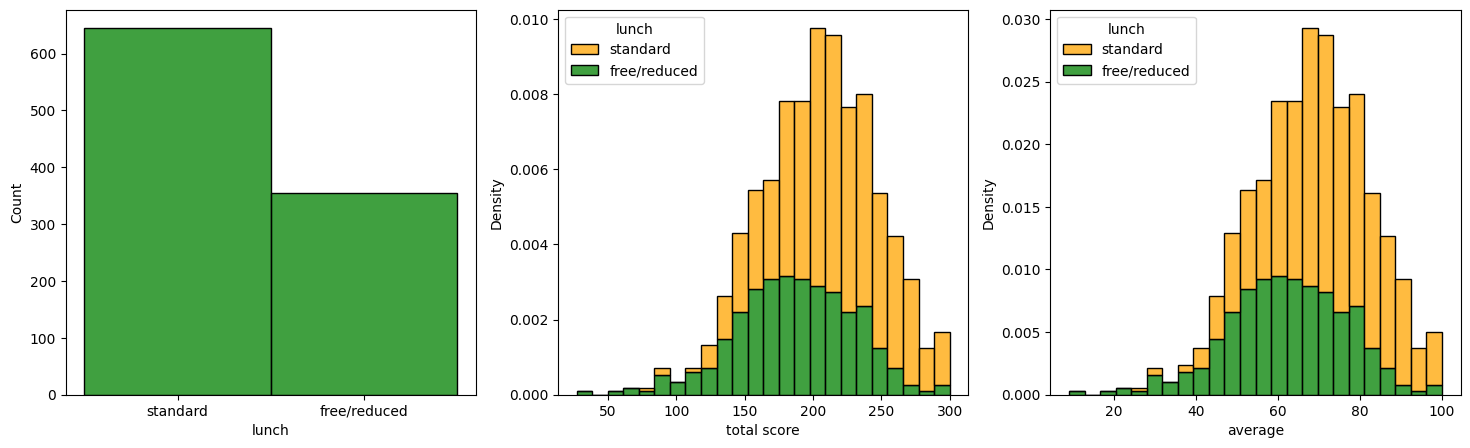

In [115]:
fig, axes = plt.subplots(1,3,figsize=(18,5))

sns.histplot(ax=axes[0],data=df,x='lunch',color='green')
sns.histplot(ax=axes[1], data=df,x='total score',stat='density',hue='lunch',palette=['orange', 'green'],multiple='stack')
sns.histplot(ax=axes[2], data=df,x='average',stat='density', hue='lunch',palette=['orange', 'green'],multiple='stack')


# insights: 
#free lunch students disproportionately higher in the lower bins from 0-140 total score bins and 0 to 50 avg score
# vice versa in standard lunch at 80-100 avt score 

# standard lunch better than reduced or free lunch for student performance 

Text(0.5, 0.98, 'Students Average Score (Math Read Write) Performance Factors')

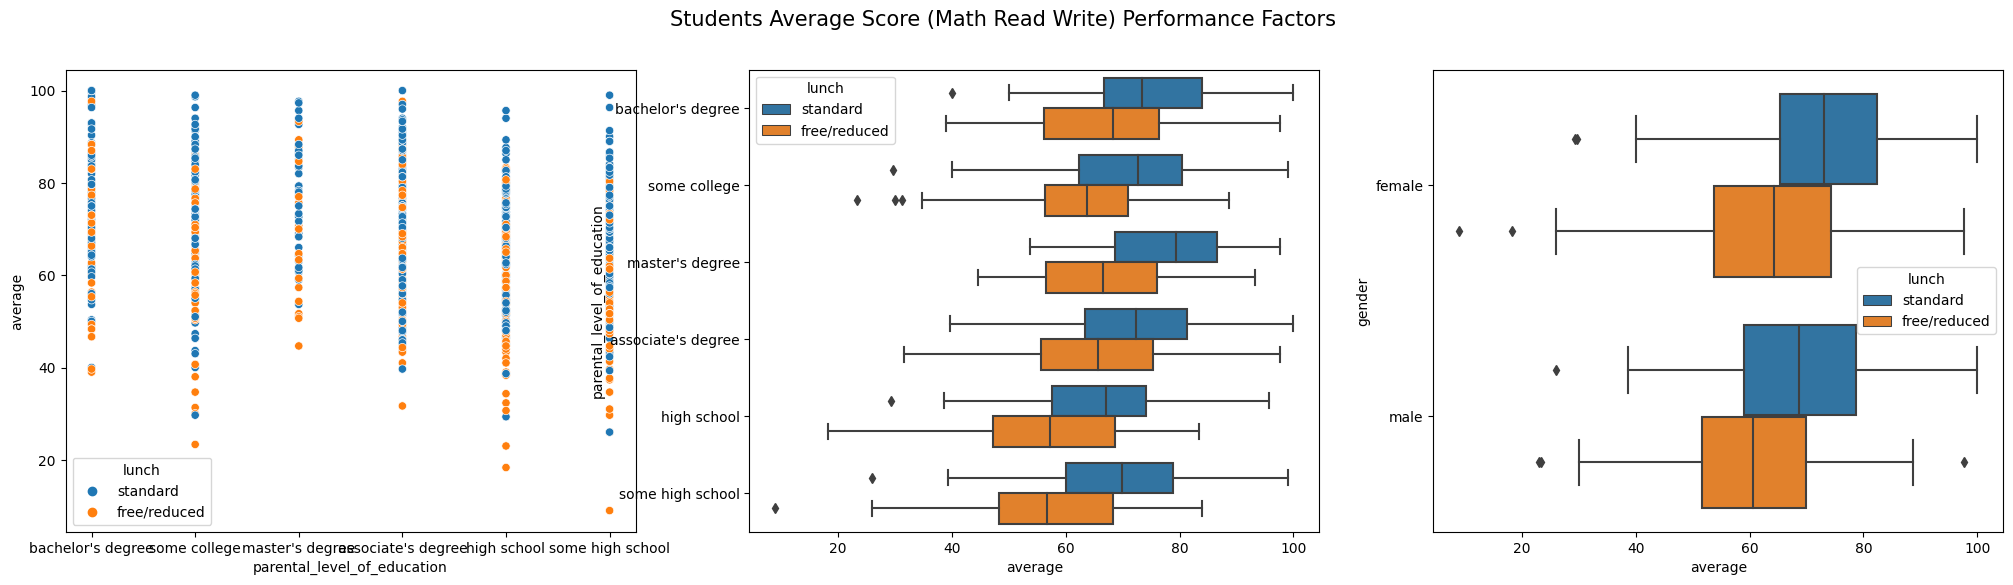

In [152]:
#parents education
fig, axes = plt.subplots(1,3,figsize=(25,6))



sns.scatterplot(ax=axes[0],data=df,x='parental_level_of_education',y='average',hue='lunch')
sns.boxplot(ax=axes[1],data=df,x='average',y='parental_level_of_education',hue='lunch')
sns.boxplot(ax=axes[2],data=df,x='average',y='gender',hue='lunch')
plt.suptitle("Students Average Score (Math Read Write) Performance Factors",fontsize=15)



In [ ]:

##insights: students parents education level and lunch type show a possible effect on student performance. Masters degree parents kids score higher. In Both genders standard lunch shows a positive correlation with performance

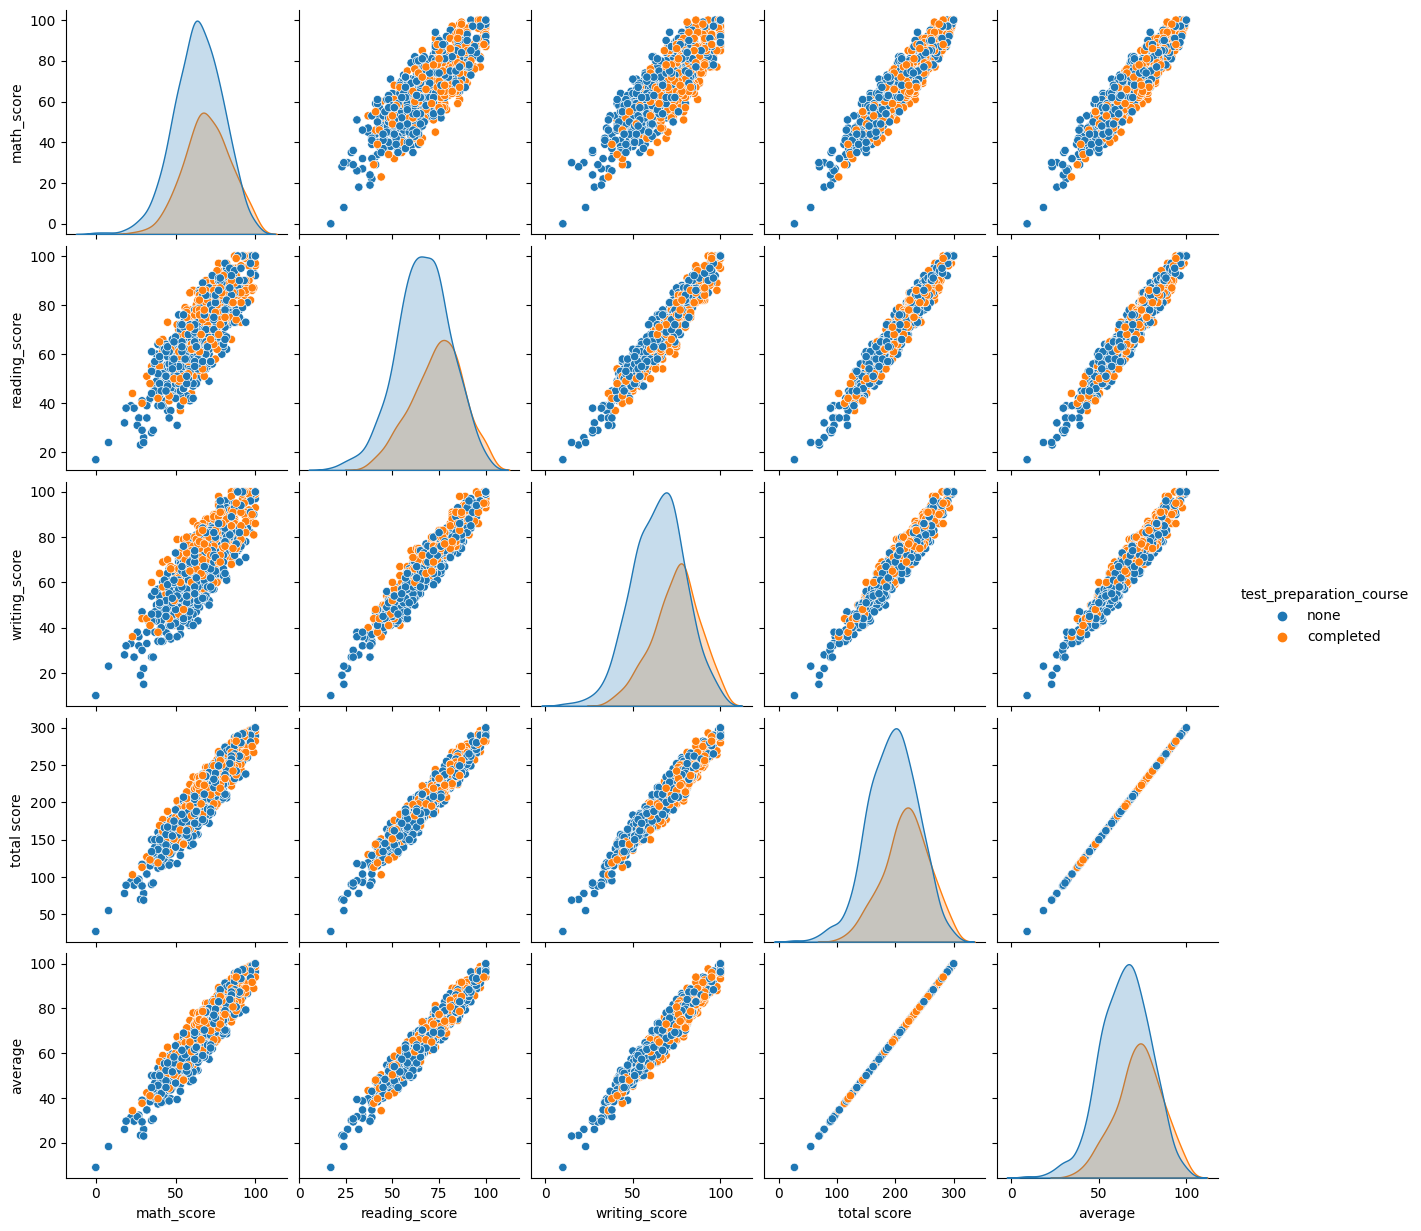

In [156]:
sns.pairplot(df,hue ='test_preparation_course')
plt.show()


<Axes: xlabel='average', ylabel='test_preparation_course'>

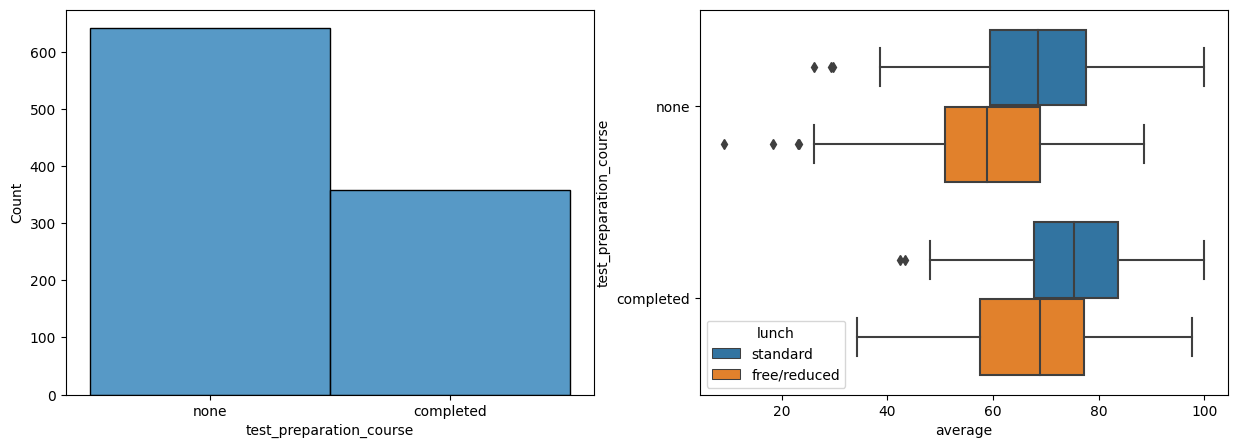

In [166]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(ax=axes[0],data=df,x ='test_preparation_course')
sns.boxplot(ax=axes[1], data=df,x ='average',y='test_preparation_course',hue='lunch')


#higher mean and 25 percentile score for students who completed test course. The relationship holds when we segment by lunch groups too.

## Conclusion

 1. No missing data in dataset
 2. Average scores in reading are higher by a small margin but no major differences among MATH,READ,WRITE scores
 3. Students lunch groups and parental education levels are correlated to average student  score.
 4. Test prep course also positively helps student performance. Gender is not a big factor but female students perform slightly better.

